# Загрузка модулов

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import timedelta
import warnings
import os
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
from sklearn.linear_model import LinearRegression


# Конфигурация

In [5]:
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

# Загрузка данных

In [6]:
df = pd.read_csv('data.csv')
df_o = pd.read_csv('overall.csv')

# Базовое исследование

In [7]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,5/1/05,H,FC Barcelona,Albacete Balompie,2:0,CF,90+1,2:0,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11/2/05,H,FC Barcelona,Panathinaikos Athens,5:0,RW,34,3:0,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:1,RW,51,2:0,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:1,RW,50,2:1,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:0,CF,82,2:0,Left-footed shot,Ronaldinho Gaacho


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            686 non-null    object
 1   Competition       686 non-null    object
 2   Matchday          686 non-null    object
 3   Date              686 non-null    object
 4   Venue             686 non-null    object
 5   Club              686 non-null    object
 6   Opponent          686 non-null    object
 7   Result            686 non-null    object
 8   Playing_Position  686 non-null    object
 9   Minute            686 non-null    object
 10  At_score          686 non-null    object
 11  Type              685 non-null    object
 12  Goal_assist       476 non-null    object
dtypes: object(13)
memory usage: 69.8+ KB


In [9]:
df.describe(include=['object']).T

,count,unique,top,freq
Season,686,18,11/12,73
Competition,686,8,LaLiga,474
Matchday,686,48,Group Stage,76
Date,686,441,3/7/12,5
Venue,686,2,H,411
Club,686,2,FC Barcelona,672
Opponent,686,89,Sevilla FC,38
Result,686,46,4:0,46
Playing_Position,686,9,CF,269
Minute,686,99,87,13


# Анализ исследовательских данных по клубным целям

# Голы в каждом соревновании

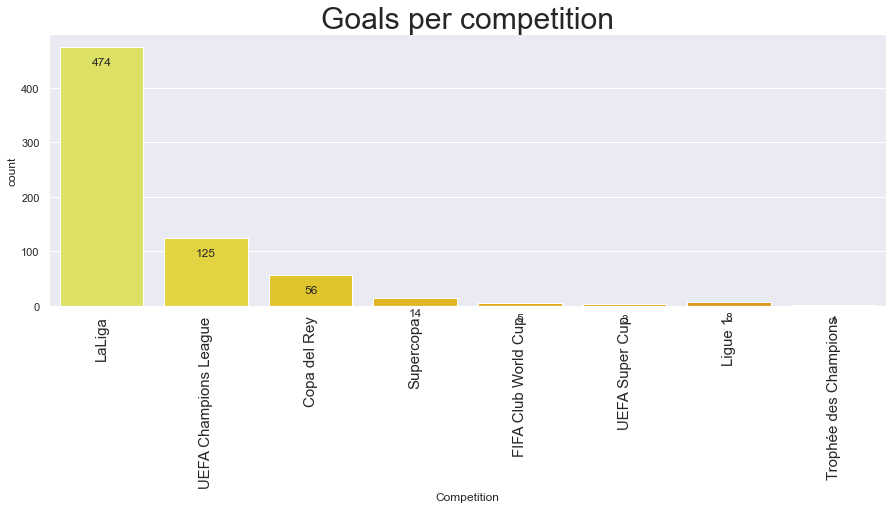

In [10]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Competition'],palette='Wistia')
p.axes.set_title("Goals per competition",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)
    


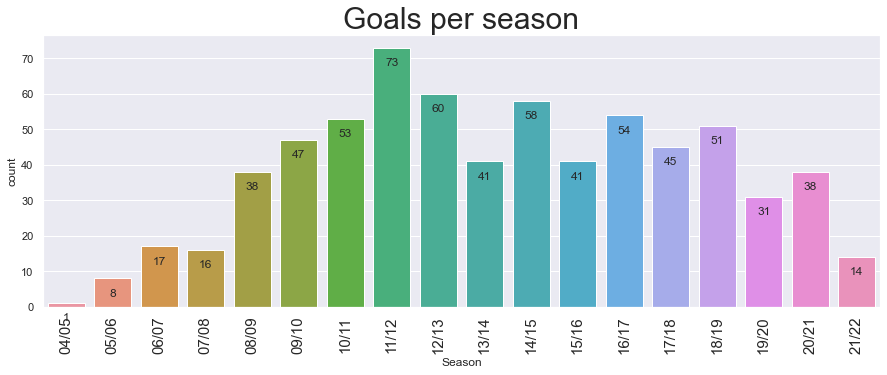

In [11]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Season'],hue_order=df.groupby('Competition'))
p.axes.set_title("Goals per season",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

<AxesSubplot:title={'center':'Goals per Clubs Played'}, ylabel='Club'>

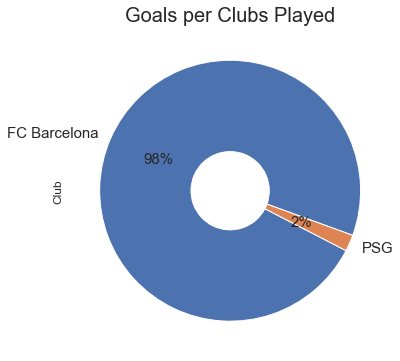

In [12]:
plt.figure(figsize=(6,6))
plt.title('Goals per Clubs Played', fontsize=20)
df.Club.value_counts().plot(kind='pie', labels=['FC Barcelona', 'PSG'], wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

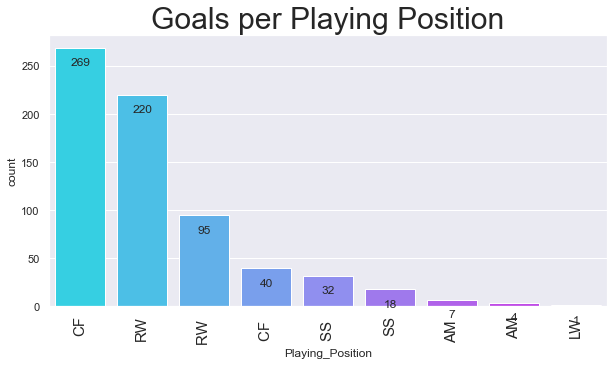

In [13]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Playing_Position'],palette='cool',order=df.Playing_Position.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Playing Position",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

In [14]:
mins=list(map(str, range(1,121)))
mins.insert(45,"1stE")
mins.insert(91,"2ndE")
mins.insert(122,"ExtE")


In [15]:
df.loc[df.Minute.str[:3]=='45+', 'Minute'] = '1stE'
df.loc[df.Minute.str[:3]=='90+', 'Minute'] = '2ndE'
df.loc[df.Minute.str[:4]=='120+', 'Minute'] = 'ExtE'

mins1=mins[:23]
mins2=mins[23:46]
mins3=mins[46:69]
mins4=mins[69:92]
mins5=mins[92:]

In [16]:
mins1 = mins[:23]
mins2 = mins[23:46]
mins3 = mins[46:69]
mins4 = mins[69:92]
mins5 = mins[92:]

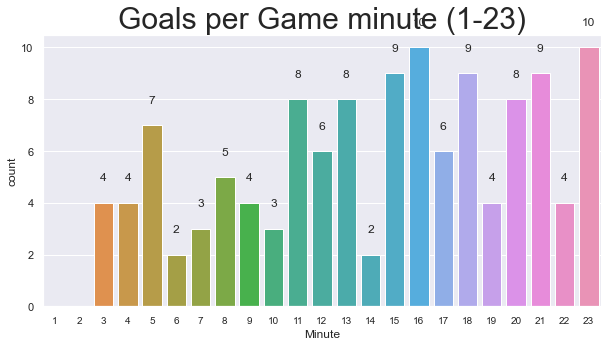

In [17]:
sns.set(rc={'figure.figsize':(10, 5)})
plt.xticks(fontsize=10)
p = sns.countplot(df['Minute'], order=mins1)
p.axes.set_title('Goals per Game minute (1-23)', fontsize=30)
for container in p.containers:
    p.bar_label(container, label_type="edge", padding=20)

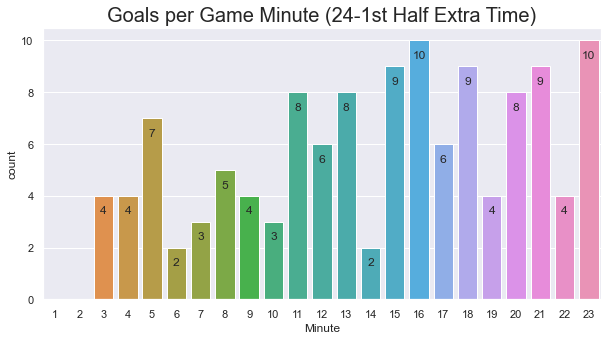

In [24]:
p = sns.countplot(df['Minute'], order=mins1)
p.axes.set_title('Goals per Game Minute (24-1st Half Extra Time)', fontsize=20)
for container in p.containers:
    p.bar_label(container, label_type="edge", padding=-20)


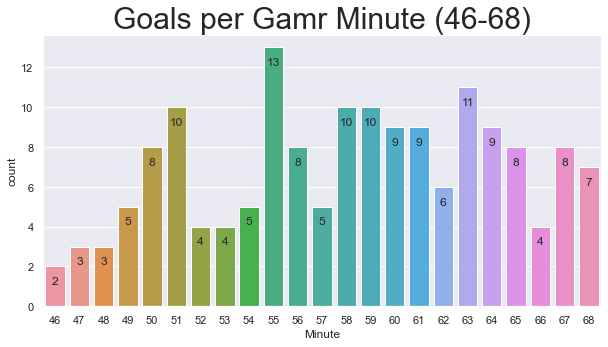

In [21]:
p = sns.countplot(df['Minute'], order=mins3)
p.axes.set_title('Goals per Gamr Minute (46-68)', fontsize=30)
for container in p.containers:
    p.bar_label(container, label_type='edge', padding=-20)

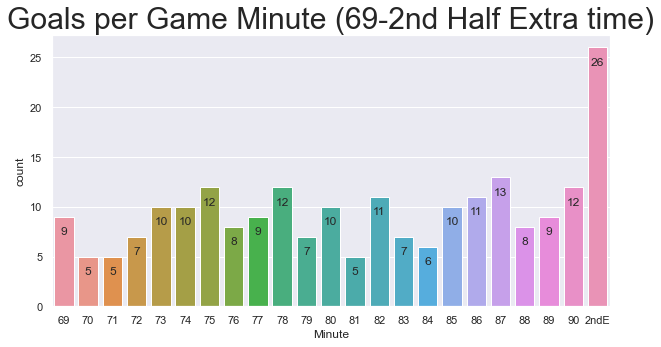

In [25]:
p=sns.countplot(df['Minute'],order=mins4)
p.axes.set_title('Goals per Game Minute (69-2nd Half Extra time)', fontsize=30)
for container in p.containers:
    p.bar_label(container, label_type='edge', padding=-20)
    

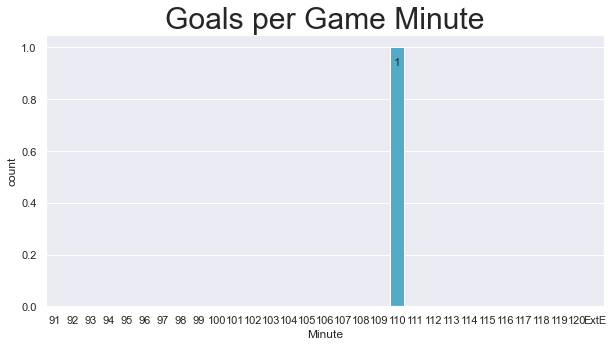

In [28]:
p=sns.countplot(df['Minute'], order=mins5)
p.axes.set_title('Goals per Game Minute', fontsize=30)
for container in p.containers:
    p.bar_label(container, label_type="edge", padding=-20)